<a href="https://www.inove.com.ar"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/PA%20Banner.png" width="1000" align="center"></a>


# Ejercicio de clasificación con redes neuronales convolucionales (CNN)

Ejemplo de clasificación utilizando redes neuronales convolucionales para la clasificación de imagenes<br>

v1.1

In [1]:
import os
import platform

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import keras
from keras.models import Sequential
from keras.utils import to_categorical

from glob import glob
import matplotlib.image as mpimg

# Recolectar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline1.png" width="1000" align="middle">

### `Simpsons dataset`:
El dataset **`Simpsons`** contiene 550Mbytes de imagenes a color de los personajes de los Simpsons (42 personajes). Cada imagen es de tiene al rededor de 500x450 píxeles a color (3 canales).<br> [Dataset source](https://www.kaggle.com/paultimothymooney/zipfiles)

In [2]:
# Descargar el dataset
import gdown
if os.access('simpsons_dataset_reducido', os.F_OK) is False:
    if os.access('simpsons_dataset_reducido.zip', os.F_OK) is False:
        url = 'https://drive.google.com/uc?id=1LYTxnd25-QwMIZ5bP3ErGzSHRmuGDXmc'
        output = 'simpsons_dataset_reducido.zip'
        gdown.download(url, output, quiet=False)
    !unzip -q simpsons_dataset_reducido.zip
else:
    print("El archivo ya se encuentra descargado")

Downloading...
From: https://drive.google.com/uc?id=1AXZzurDMFpC2eb5xu7dpiFk9RkHsNFem
To: /content/simpsons_dataset_reducido.zip
48.4MB [00:00, 186MB/s]


In [3]:
# Visualizar los directiorios o tipos de personas
os.listdir("./simpsons_dataset_reducido")

['validation', 'train']

In [4]:
 # Visualizar los tipos de personajes
 train_dir = "./simpsons_dataset_reducido/train"
 validation_dir = "./simpsons_dataset_reducido/validation"
 os.listdir(train_dir)

['snake_jailbird',
 'otto_mann',
 'moe_szyslak',
 'charles_montgomery_burns',
 'milhouse_van_houten',
 'cletus_spuckler',
 'patty_bouvier',
 'disco_stu',
 'fat_tony',
 'lionel_hutz',
 'lenny_leonard',
 'professor_john_frink',
 'nelson_muntz',
 'sideshow_mel',
 'kent_brockman',
 'mayor_quimby',
 'rainier_wolfcastle',
 'krusty_the_clown',
 'groundskeeper_willie',
 'ralph_wiggum',
 'ned_flanders',
 'miss_hoover',
 'troy_mcclure',
 'marge_simpson',
 'martin_prince',
 'edna_krabappel',
 'abraham_grampa_simpson',
 'selma_bouvier',
 'barney_gumble',
 'chief_wiggum',
 'comic_book_guy',
 'apu_nahasapeemapetilon',
 'maggie_simpson',
 'principal_skinner',
 'gil',
 'bart_simpson',
 'lisa_simpson',
 'carl_carlson',
 'sideshow_bob',
 'waylon_smithers',
 'agnes_skinner',
 'homer_simpson']

In [5]:
personajes = os.listdir(train_dir)
print("Cantidad de tipos de personaejs:", len(personajes))

Cantidad de tipos de personaejs: 42


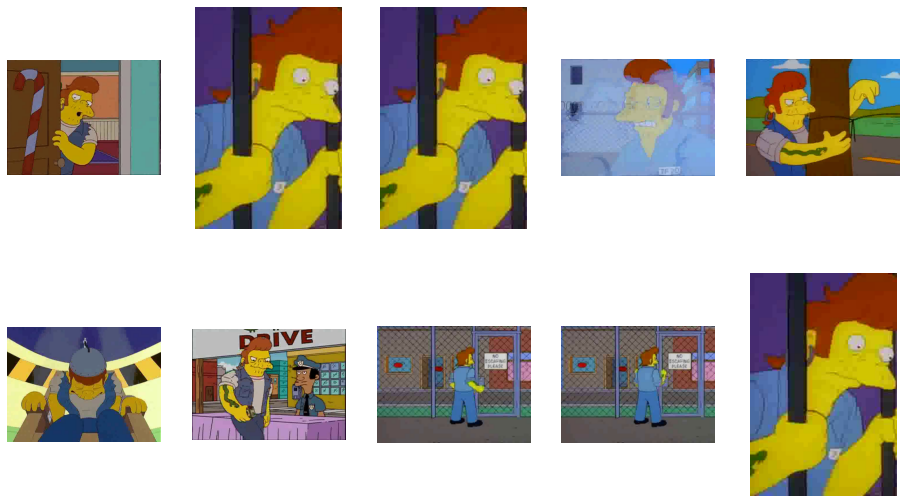

In [6]:
# Visualizar las 10 primeras imagenes de un personaje
files = glob(train_dir + "/" + personajes[0] + "/**.jpg")

fig = plt.figure(figsize=(16,9))
for i in range(10):
    ax = fig.add_subplot(2, 5, i+1)
    ax.axis('off')
    img = mpimg.imread(files[i])
    plt.imshow(img)
plt.show()

In [7]:
# Visualizar la dimension de la primera imagen
img = mpimg.imread(files[0])
img.shape

(480, 640, 3)

In [8]:
# Visualizar como están representados los pixeles
print(img[85, 100:110, :])

[[ 60  47  39]
 [ 60  47  39]
 [ 60  47  39]
 [ 60  47  39]
 [ 31  18  10]
 [ 44  31  23]
 [ 66  53  47]
 [ 91  78  72]
 [114 101  95]
 [130 117 111]]


#### Conclusiones
- Las imagenes tienen tamaño variable, utilizaremos un tamaño reducido para que todas las imagenes sean iguales (se elije 150x150)
- Las imagenes están representadas de 0 a 255, hay que normalizarlas

Cantidad de snake : 40


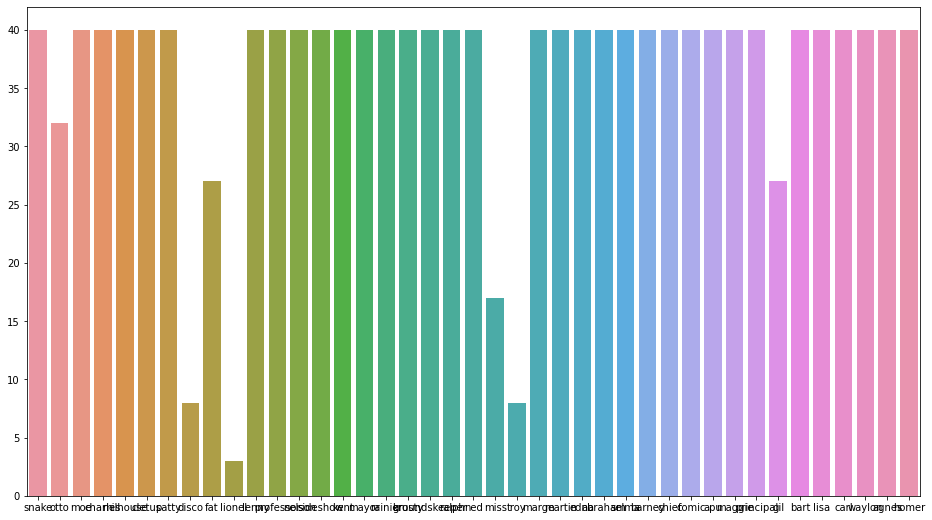

In [9]:
# Analizar cuantos personajes hay de cada uno
nombre_personajes = []
cantidad_personajes = []
for personaje in personajes:
    nombre_personaje = personaje.split("_")[0]
    files = glob(train_dir + "/" + personaje + "/**.jpg")
    nombre_personajes.append(nombre_personaje)
    cantidad_personajes.append(len(files))

print("Cantidad de", nombre_personajes[0], ":", cantidad_personajes[0])
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot()
sns.barplot(x=nombre_personajes, y=cantidad_personajes, ax=ax)
plt.show()

Se puede ver que el dataset está bastante balanceado

In [10]:
# Descargar datos de test
if os.access('simpsons_test', os.F_OK) is False:
    if os.access('simpsons_test.zip', os.F_OK) is False:
        if platform.system() == 'Windows':
            !curl https://github.com/InoveAlumnos/dataset_analytics_python/raw/master/simpsons_test.zip > simpsons_test.zip
        else:
            !wget simpsons_test.zip https://github.com/InoveAlumnos/dataset_analytics_python/raw/master/simpsons_test.zip
    !unzip -q simpsons_test.zip
else:
    print("El archivo ya se encuentra descargado")

--2020-12-07 20:32:24--  http://simpsons_test.zip/
Resolving simpsons_test.zip (simpsons_test.zip)... failed: Name or service not known.
wget: unable to resolve host address ‘simpsons_test.zip’
--2020-12-07 20:32:25--  https://github.com/InoveAlumnos/dataset_analytics_python/raw/master/simpsons_test.zip
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/simpsons_test.zip [following]
--2020-12-07 20:32:25--  https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/simpsons_test.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11394

# Procesar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline2.png" width="1000" align="middle">

In [11]:
from keras.preprocessing.image import ImageDataGenerator

# Crear un generador, indicando si deseamos realizar un escalado de la imagen
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=40,
                    width_shift_range=0.2,
                    height_shift_range=0.2,
                    shear_range=0.2,
                    zoom_range=0.2,
                    horizontal_flip=True)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        directory=train_dir,
        target_size=(150, 150),
        batch_size=140,
        class_mode="categorical")

validation_generator = validation_datagen.flow_from_directory(
        directory=validation_dir,
        target_size=(150, 150),
        batch_size=80,
        class_mode="categorical")

index_to_classes = dict(zip(train_generator.class_indices.values(), train_generator.class_indices.keys()))


Found 1522 images belonging to 42 classes.
Found 323 images belonging to 42 classes.


# Explorar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline3.png" width="1000" align="middle">

In [12]:
# El generador "train_generator" se lo puede utilizar para acceder a los datos
# de a cantidad batch de imagenes. En este caso el generador me retornará
# la primera vez las primeras 20 imagenes
# El generador devuelve las imagenes (X) y las clases(personaes) a las que
# pertenece (y)
# X, y = train_generator.next()
batch_imagenes, batch_clases = train_generator.next()

In [13]:
batch_imagenes.shape

(140, 150, 150, 3)

In [14]:
batch_clases.shape

(140, 42)

In [15]:
print("Cantidad de imagenes en el batch:", batch_imagenes.shape[0])
print("Dimensión de la imagen:", batch_imagenes.shape[1:])

Cantidad de imagenes en el batch: 140
Dimensión de la imagen: (150, 150, 3)


In [16]:
print("Cantidad de clases/personajes:", batch_clases.shape[1])

Cantidad de clases/personajes: 42


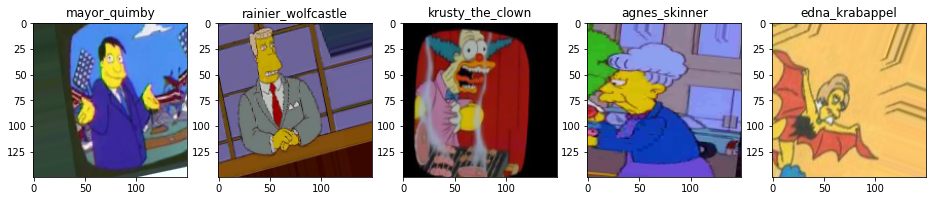

In [17]:
# Observar las primeras 5 imagenes de ese batch
fig = plt.figure(figsize=(16,9))
for i in range(5):
    ax = fig.add_subplot(1, 5, i+1)
    ax.imshow(batch_imagenes[i])
    numero_clase = batch_clases[i].argmax()
    ax.set_title(index_to_classes[numero_clase])
plt.show()

__Importante__! Luego de usar un generador "jugando", ese batch de imagenes que sacamos ya no se encontrará disponible para ser utilizado en el entrenamiento, es recomendable volver a crear los generadores si se los consumen

In [18]:
# Crear un generador, indicando si deseamos realizar un escalado de la imagen
train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        directory=train_dir,
        target_size=(150, 150),
        batch_size=140,
        class_mode="categorical")

index_to_classes = dict(zip(train_generator.class_indices.values(), train_generator.class_indices.keys()))

Found 1522 images belonging to 42 classes.


# Entrenar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline4.png" width="1000" align="middle">

In [19]:
# Los generadores ya que encargan de transformar la salida a oneHotEncoding

In [20]:
# input shape (observado del análisis de datos)
in_shape = (150, 150, 3)
in_shape

(150, 150, 3)

In [21]:
# output shape (observado del análisis de datos)
out_shape = 42
out_shape

42

In [22]:
# Debemos definir cuantas imagenes se consumiran por epoca (steps_per_epoch)
# ya que estando el generador en el medio Keras no puede saberlo por
# su cuenta
steps_per_epoch_train = len(train_generator)
steps_per_epoch_train

11

In [23]:
steps_per_epoch_validation = len(validation_generator)
steps_per_epoch_validation

5

In [24]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import Input

# Traemos el modelo RestNet pre entrenado con los pesos
# obtenidos del dataset de ImageNet
# Indicamos que no deseamos las ultimas capsa
# de claseificación de la red (include_top=False)
# Indicamos que no deseamos que los pesos de la red
# sean entrenados (resnet_base.trainable=False)

input_t = Input(shape=in_shape)
resnet_base = ResNet50(weights='imagenet',
            include_top=False,
            input_tensor=input_t)
resnet_base.trainable=False
resnet_base.summary()

94773248/94765736 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 156, 156, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 75, 75, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 75, 75, 64)   256         conv1_conv[0][0]                 
__________________________

In [32]:
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D

model = Sequential()

# Ahora agregaremos más pares de capas CONV + POOL a fin de reducir más la
# dimensión de la imagen antes de llegar a la capa flatten
# Otra estrategia es ir aumentando la cantidad de filtros a medida que crece
# la profundidad de la red

model.add(resnet_base)

model.add(Flatten())
model.add(Dense(units=8, activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(units=out_shape, activation='softmax'))

model.compile(optimizer="Adam",
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 5, 5, 2048)        23587712  
_________________________________________________________________
flatten_5 (Flatten)          (None, 51200)             0         
_________________________________________________________________
dense_14 (Dense)             (None, 8)                 409608    
_________________________________________________________________
dropout_9 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_15 (Dense)             (None, 64)                576       
_________________________________________________________________
dropout_10 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 42)               

In [33]:
history = model.fit(
      train_generator,
      steps_per_epoch=steps_per_epoch_train,
      validation_data=validation_generator,
      validation_steps=steps_per_epoch_validation,
      epochs=20
      )

Epoch 1/20
11/11 [==============================] - 6s 587ms/step - loss: 3.7583 - accuracy: 0.0263 - val_loss: 3.7353 - val_accuracy: 0.0310
Epoch 2/20
11/11 [==============================] - 5s 495ms/step - loss: 3.7357 - accuracy: 0.0263 - val_loss: 3.7326 - val_accuracy: 0.0310
Epoch 3/20
11/11 [==============================] - 5s 490ms/step - loss: 3.7340 - accuracy: 0.0276 - val_loss: 3.7299 - val_accuracy: 0.0310
Epoch 4/20
11/11 [==============================] - 5s 492ms/step - loss: 3.7325 - accuracy: 0.0296 - val_loss: 3.7271 - val_accuracy: 0.0310
Epoch 5/20
11/11 [==============================] - 5s 486ms/step - loss: 3.7306 - accuracy: 0.0256 - val_loss: 3.7241 - val_accuracy: 0.0310
Epoch 6/20
11/11 [==============================] - 5s 486ms/step - loss: 3.7286 - accuracy: 0.0263 - val_loss: 3.7208 - val_accuracy: 0.0310
Epoch 7/20
11/11 [==============================] - 5s 482ms/step - loss: 3.7275 - accuracy: 0.0210 - val_loss: 3.7175 - val_accuracy: 0.0310
Epoch 

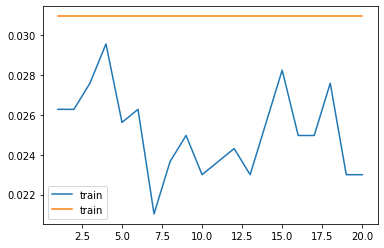

In [34]:
epoch_count = range(1, len(history.history['accuracy']) + 1)
sns.lineplot(x=epoch_count,  y=history.history['accuracy'], label='train')
sns.lineplot(x=epoch_count,  y=history.history['val_accuracy'], label='train')
plt.show()

In [35]:
# Predecir los datos
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        directory="./simpsons_test",
        target_size=(150, 150),
        batch_size=10,
        class_mode=None,
        shuffle=False)

y_hat_prob = model.predict(test_generator)
y_hat_prob[0]

Found 10 images belonging to 1 classes.


array([0.02452403, 0.02502631, 0.02586282, 0.02514249, 0.02404346,
       0.02639274, 0.02565949, 0.02485571, 0.02459576, 0.02572509,
       0.01145724, 0.0244398 , 0.01890129, 0.01875324, 0.02572591,
       0.02550827, 0.02555753, 0.0261332 , 0.02598916, 0.0103481 ,
       0.02455113, 0.02494199, 0.02469251, 0.02659549, 0.02489123,
       0.02720702, 0.01594697, 0.02525277, 0.02657398, 0.02452484,
       0.02047423, 0.02677574, 0.02541989, 0.02650575, 0.02530585,
       0.02614988, 0.0262037 , 0.02541054, 0.02415206, 0.02565229,
       0.01329682, 0.02483375], dtype=float32)

In [36]:
y_hat = np.argmax(y_hat_prob,axis=1)
y_hat

array([25, 25, 25, 25, 25, 25, 25, 25, 25, 25])

In [37]:
#¿Cómo obtenemos el "y" verdadero?
test_generator.filenames

['test_images/abraham_grampa_simpson_39.jpg',
 'test_images/charles_montgomery_burns_24.jpg',
 'test_images/homer_simpson_33.jpg',
 'test_images/krusty_the_clown_17.jpg',
 'test_images/lisa_simpson_5.jpg',
 'test_images/lisa_simpson_7.jpg',
 'test_images/marge_simpson_18.jpg',
 'test_images/milhouse_van_houten_46.jpg',
 'test_images/nelson_muntz_12.jpg',
 'test_images/sideshow_bob_38.jpg']

In [38]:
# Muy rebuscada esta forma de obtener los nombres de los personajes!
# Pero en general cuando tenemos los datos de test no tenemos los nombres
# por lo que no tenemos el "y" verdadero
personajes_test = []
for file in test_generator.filenames:
    image_name = os.path.basename(file)
    image_name_split = image_name.split("_")
    personaje_name_split = image_name_split[:len(image_name_split)-1]
    personaje = personaje_name_split[0]
    for name in personaje_name_split[1:]:
        personaje += "_" + name
    personajes_test.append(personaje)
personajes_test

['abraham_grampa_simpson',
 'charles_montgomery_burns',
 'homer_simpson',
 'krusty_the_clown',
 'lisa_simpson',
 'lisa_simpson',
 'marge_simpson',
 'milhouse_van_houten',
 'nelson_muntz',
 'sideshow_bob']

In [39]:
# Obtener el "y" verdadero
y_test = [train_generator.class_indices[personaje] for personaje in personajes_test]
y_test

[0, 6, 15, 17, 20, 20, 22, 25, 29, 37]

# Validar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline5.png" width="1000" align="middle">

In [40]:
# Calcular la exactitud (accuracy)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_hat)

0.1

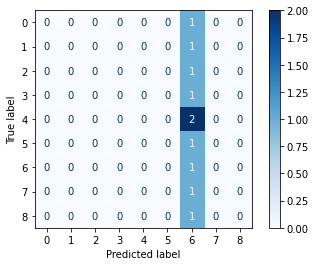

In [41]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_hat)
cmd = ConfusionMatrixDisplay(cm, display_labels=range(47))
cmd.plot(cmap=plt.cm.Blues)
plt.show()

# Utilizar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline6.png" width="1000" align="middle">

Se utiliza el ranking de los peores 10 números clasificados con una ANN para evlauar contra este nuevo modelo de red neuronal

In [42]:
batch_test = test_generator.next()

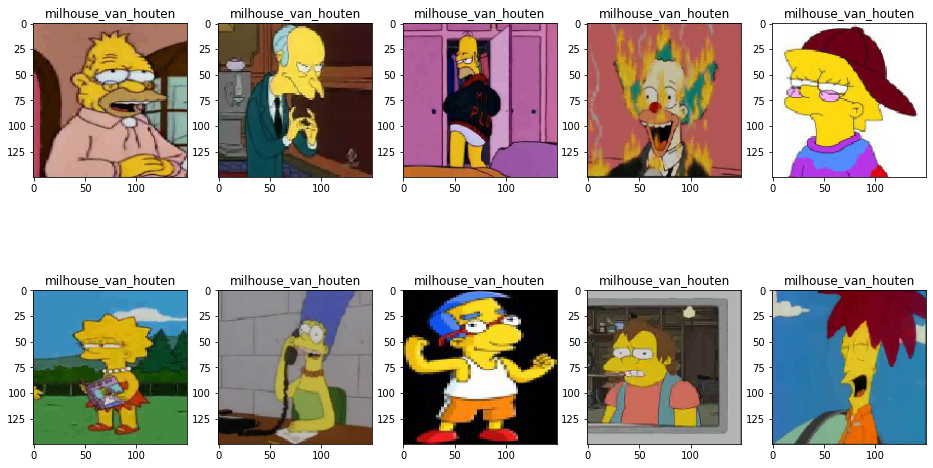

In [43]:
# Observar las primeras 5 imagenes de ese batch
fig = plt.figure(figsize=(16,9))
for i in range(10):
    ax = fig.add_subplot(2, 5, i+1)
    ax.imshow(batch_test[i])
    numero_clase = y_hat[i]
    ax.set_title(index_to_classes[numero_clase])
plt.show()

# Conclusión
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline7.png" width="1000" align="middle">

En este ensayo se analizó que la red ResNet50 es demasiado grande para los datos, el sistema es incapaz de aprender del dataset entregado. Rrequeire más datos ya que la cantidad de filtros es gigante (2048).